In [ ]:
  !pip install -U -q Pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
!pip install gensim

    100% |████████████████████████████████| 23.5MB 612kB/s 
    100% |████████████████████████████████| 1.4MB 12.6MB/s 
    100% |████████████████████████████████| 133kB 25.6MB/s 
    100% |████████████████████████████████| 61kB 18.1MB/s 
    100% |████████████████████████████████| 4.7MB 5.7MB/s 
    100% |████████████████████████████████| 552kB 23.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [ ]:
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [ ]:
train_downloaded = drive.CreateFile({'id': '1LgNo7LS202N7BuUaQQt4tVwchHRJm8S9'})
train_downloaded.GetContentFile('final_clean.csv')

In [ ]:

data = pd.read_csv('final_clean.csv')
data.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...


In [ ]:
df1=data.sort_values('Time', axis=0, ascending=True,
                   inplace=False, kind='quicksort', na_position='last')
df1.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
30,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...


In [ ]:
final=df1.sample(n=200000 ,replace=True,random_state=None, axis=0)
final.shape

(200000, 11)

In [ ]:
X = final['cleanedText']
Y = final['Score']


In [ ]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TFIDF
----

In [ ]:
tf_idf_vect = TfidfVectorizer()
train_tfidf = tf_idf_vect.fit_transform(X_train)
test_tfidf = tf_idf_vect.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def gridcv(train_feat,test_feat,y_train,y_test):
    parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    model= GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, n_jobs=-1,scoring='f1',cv=5)
    model.fit(train_feat, y_train)
    print('Best Estimator:      ',model.best_estimator_)
    print('Optimal parameters:  ',model.best_params_)
    print('optimal score:       ',model.best_score_*(100))
    print('----------------------------------------------------------------')

    model.best_estimator_.fit(train_feat, y_train)
    y_true, y_pred = y_test,model.best_estimator_.predict(test_feat)
    confusion = confusion_matrix(y_true,y_pred)
    print("Classification_Report")
  
    print(classification_report(y_true, y_pred))
    print(precision_recall_fscore_support(y_true, y_pred, average='micro'))
    print('<==========confusion matrix for test data=========>')
    p= sns.heatmap(confusion, annot=True, fmt="d", cmap="Spectral",square=True)



In [ ]:
from sklearn.tree import DecisionTreeClassifier

def gridcv(train_feat,test_feat,y_train,y_test):
    parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    model= GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, n_jobs=-1,scoring='accuracy',cv=5)
    model.fit(train_feat, y_train)
    print('Best Estimator:      ',model.best_estimator_)
    print('Optimal parameters:  ',model.best_params_)
    print('optimal score:       ',model.best_score_*(100))
    print('-------------------------------------------------')

    model.best_estimator_.fit(train_feat, y_train)
    y_true, y_pred = y_test,model.best_estimator_.predict(test_feat)
    confusion = confusion_matrix(y_true,y_pred)
    print("Classification_Report")
  
    print(classification_report(y_true, y_pred))
    print(precision_recall_fscore_support(y_true, y_pred, average='micro'))
    print('<==========confusion matrix for test data=========>')
    p= sns.heatmap(confusion, annot=True, fmt="d", cmap="Spectral",square=True)



Best Estimator:       DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Optimal parameters:   {'max_depth': 10}
optimal score:        92.5917755682379
----------------------------------------------------------------
Classification_Report
             precision    recall  f1-score   support

          0       0.73      0.22      0.34      9590
          1       0.87      0.98      0.92     50410

avg / total       0.85      0.86      0.83     60000

(0.8630666666666666, 0.8630666666666666, 0.8630666666666666, None)
<==========confusion matrix for test data=========>


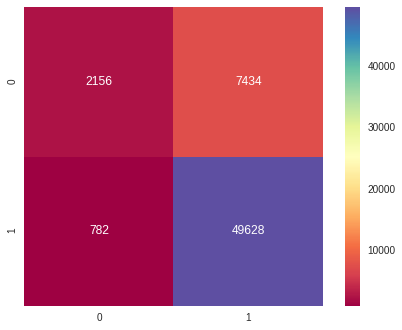

In [ ]:
gridcv(train_tfidf,test_tfidf,Y_train,Y_test)

In [ ]:
def plot_depth(train_feat,test_feat,y_train,y_test):
    cv_score =[]
    depth = [1,2,3,4,5,6,7,8,9,10]
    for d in depth:
        dtc = DecisionTreeClassifier(max_depth=d)
        dtc.fit(train_feat,y_train)
        pred = dtc.predict(test_feat)
        acc = accuracy_score(y_test,pred,normalize=True)
        cv_score.append(1-acc)
    plt.plot(depth,cv_score)
    plt.xlabel('Depth ------------->')
    plt.ylabel('Cross Validation error --------------->')
    plt.title("Depth    (VS)    CV-error")
    plt.show()

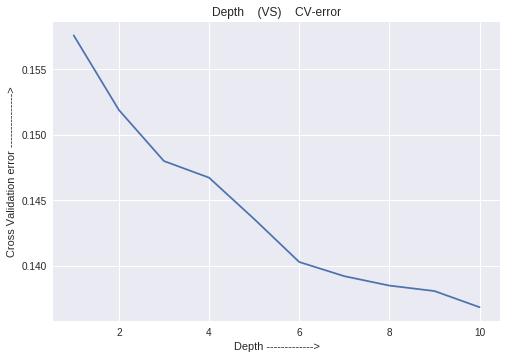

In [ ]:
plot_depth(train_tfidf,test_tfidf,Y_train,Y_test)

BAG OF WORDS
------

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
BOW_TRAIN = count_vect.fit_transform(X_train)
BOW_TEST = count_vect.transform(X_test)


Best Estimator:       DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Optimal parameters:   {'max_depth': 10}
optimal score:        92.58625964044072
----------------------------------------------------------------
Classification_Report
             precision    recall  f1-score   support

          0       0.74      0.22      0.33      9590
          1       0.87      0.99      0.92     50410

avg / total       0.85      0.86      0.83     60000

(0.8627833333333333, 0.8627833333333333, 0.8627833333333333, None)
<==========confusion matrix for test data=========>


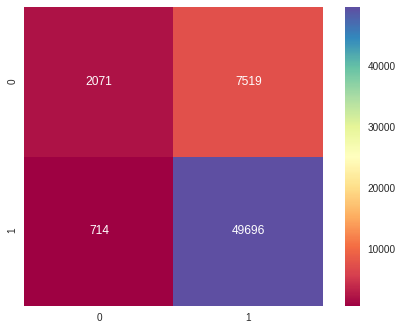

In [ ]:
gridcv(BOW_TRAIN,BOW_TEST,Y_train,Y_test)


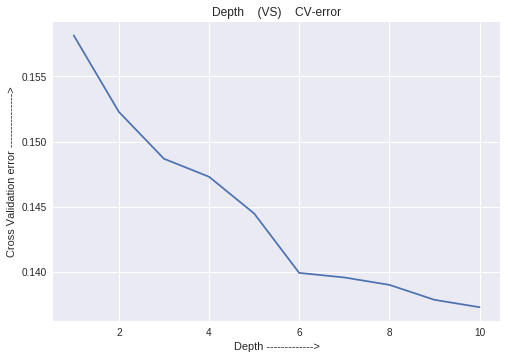

In [ ]:
plot_depth(BOW_TRAIN,BOW_TEST,Y_train,Y_test)

 TRAINING OUR OWN WORD 2 VEC
---

In [ ]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [ ]:
import re
i=0
list_of_train=[]
for sent in X_train:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_train.append(filtered_sentence)


In [ ]:
i =0
list_of_test =[]
for sent in X_test:
    final_test = []
    sent = cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                final_test.append(cleaned_words.lower())
            else:
                continue
    list_of_test.append(final_test)

In [ ]:
from gensim.models import Word2Vec
w2v_train_model=Word2Vec(list_of_train,min_count=3,size=100,workers=5)


In [ ]:
w2v_test_model=Word2Vec(list_of_test,min_count=3,size=100,workers=5)


AVERAGE W2V
-----

In [ ]:
w2v_words=list(w2v_train_model.wv.vocab)
sent_train=[]# the avg-w2v for each sentence/review is stored in this list
for sentence in list_of_train:# for each review/sentence
  sent_vect=np.zeros(100)# as word vectors are of zero length
  cnt_words=0# num of words with a valid vector in the sentence/review
  for words in sent:# for each word in a review/sentence
    if words in w2v_words:
      vect= w2v_train_model.wv[words]
      sent_vect+=vect
      cnt_words += 1
  if cnt_words !=0:
     sent_vect /=cnt_words
  sent_train.append(sent_vect)
print(len(sent_train))
print(len(sent_train[1]))

140000
100


In [ ]:
w2v_word=list(w2v_test_model.wv.vocab)

sent_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_test: # for each review/sentence
    sent_vectors = np.zeros(100) # as word vectors are of zero length
    ct_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_word:
            vectors = w2v_test_model.wv[word]
            sent_vectors += vectors
            ct_words += 1
    if ct_words !=0: 
        sent_vectors /= ct_words
        sent_test.append(sent_vectors)
print(len(sent_test))
print(len(sent_test[0]))


60000
100


Best Estimator:       DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Optimal parameters:   {'max_depth': 1}
optimal score:        84.42785714285715
-------------------------------------------------
Classification_Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      9367
          1       0.84      1.00      0.92     50633

avg / total       0.71      0.84      0.77     60000

(0.8438833333333333, 0.8438833333333333, 0.8438833333333333, None)
<==========confusion matrix for test data=========>


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


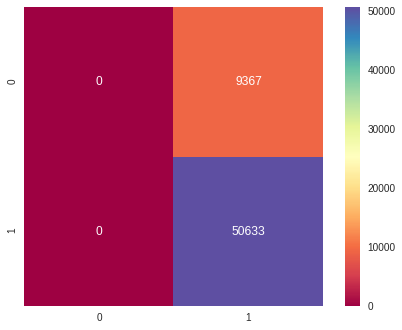

In [ ]:
gridcv(sent_train,sent_test,Y_train,Y_test)

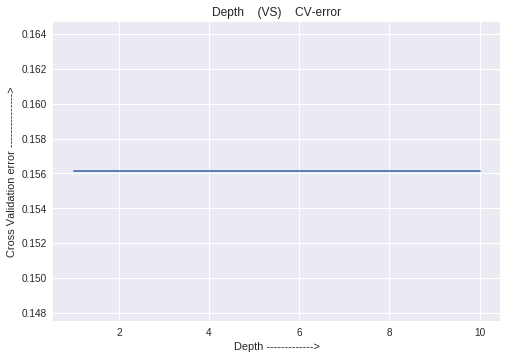

In [ ]:
plot_depth(sent_train,sent_test,Y_train,Y_test)

TFIDF WORD 2 VEC
--------------

In [ ]:
tf_idf_vect = TfidfVectorizer()
w2v_train = tf_idf_vect.fit_transform(X_train)
tf_idf_vectt = TfidfVectorizer()
w2v_test = tf_idf_vectt.fit_transform(X_test)

In [ ]:
w2v_words=list(w2v_train_model.wv.vocab)

tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0;
    # num of words with a valid vector in the sentence/review
    for word in sent:
       if word in w2v_words:
          vec = w2v_train_model.wv[words]
          # obtain the tf_idfidf of a word in a sentence/review
          tfidf = w2v_train[row, tfidf_feat.index(words)]
          sent_vec += (vec * tfidf)
          weight_sum += tfidf
    if weight_sum!=0:
      sent_vec /= weight_sum
    tfidf_sent_train.append(sent_vec)
    row+=1
print(len(tfidf_sent_train))
print(len(tfidf_sent_train[1]))
    


140000
100


In [ ]:
tfidf_featt = tf_idf_vectt.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
w2v_words=list(w2v_test_model.wv.vocab)

tfidf_sent_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_test: # for each review/sentence
    sent_vect = np.zeros(100) # as word vectors are of zero length
    weight_summ =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vect = w2v_test_model.wv[words]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf_tst = w2v_test[row, tfidf_featt.index(words)]
            sent_vect += (vect * tfidf_tst)
            weight_summ += tfidf_tst
    if weight_summ!=0:
       sent_vect /= weight_summ
    tfidf_sent_test.append(sent_vect)
    row += 1
print(len(tfidf_sent_test))
print(len(tfidf_sent_test[1]))

60000
100


Best Estimator:       DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Optimal parameters:   {'max_depth': 5}
optimal score:        84.42857142857143
-------------------------------------------------
Classification_Report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      9367
          1       0.84      1.00      0.92     50633

avg / total       0.71      0.84      0.77     60000

(0.8438833333333333, 0.8438833333333333, 0.8438833333333333, None)
<==========confusion matrix for test data=========>


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


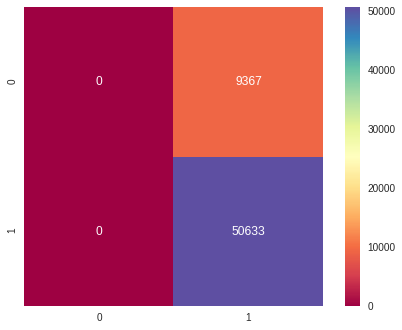

In [ ]:
gridcv(tfidf_sent_train,tfidf_sent_test,Y_train,Y_test)

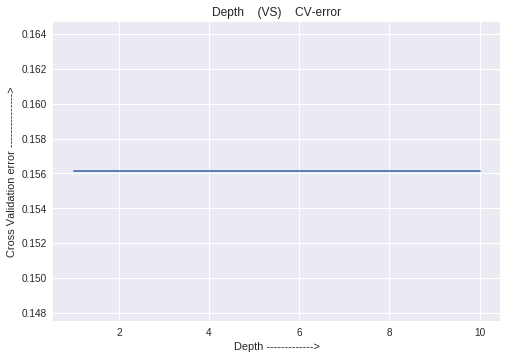

In [ ]:
plot_depth(tfidf_sent_train,tfidf_sent_test,Y_train,Y_test)